In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import QuantLib as ql
%matplotlib inline

In [30]:
ql.__version__


'1.19'

In [31]:
# option data
maturity_date = ql.Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols or implied vols
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8, 5, 2015)
ql.Settings.instance().evaluationDate = calculation_date

In [32]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date

am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

eu_exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, eu_exercise)

In [33]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle,
                                           dividend_yield,
                                           flat_ts,
                                           flat_vol_ts)

In [34]:
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
american_option.setPricingEngine(binomial_engine)
print (american_option.NPV())

6.84210328728556


In [35]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

steps = range(5, 200, 1)
eu_prices = [binomial_price(european_option, bsm_process, step) for step in steps]
am_prices = [binomial_price(american_option, bsm_process, step) for step in steps]
# theoretican European option price
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()

In [36]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

steps = range(5, 200, 1)
eu_prices = [binomial_price(european_option, bsm_process, step) for step in steps]
am_prices = [binomial_price(american_option, bsm_process, step) for step in steps]
# theoretican European option price
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()

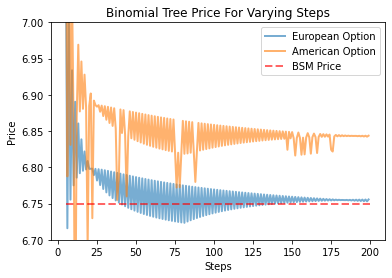

In [37]:
plt.plot(steps, eu_prices, label="European Option", lw=2, alpha=0.6)
plt.plot(steps, am_prices, label="American Option", lw=2, alpha=0.6)
plt.plot([5,200],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.ylim(6.7,7)
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()

In [48]:
dvol_CO6_17_20 = pd.read_csv("CO6_17_20.csv")
dvol_CO6_08_09 = pd.read_csv("CO6_08_09.csv")
dvol_CO6_14_15 = pd.read_csv("CO6_14_15.csv")
dvol_CO06_17_20 = pd.read_csv("COH1_17_20.csv")




,Date,Hist,ATM100,ATM80
0,08/21/20,27.566352,36.121,43.788
1,08/20/20,27.379583,36.022,44.017
2,08/19/20,27.911315,36.279,44.458
3,08/18/20,27.942348,36.087,44.984
4,08/17/20,28.447734,36.525,45.185


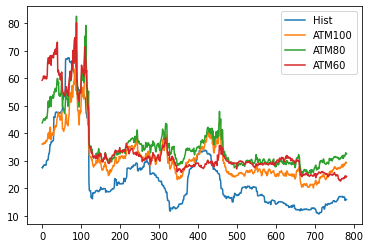

In [49]:
dvol_CO6_17_20.plot()
dvol_CO06_17_20.head()

In [46]:
dvol_CO06_17_20 =dvol_CO06_17_20.set_index('Date')
dvol_CO06_17_20.head()

,Hist,ATM100,ATM80
Date,,,
08/21/20,27.566352,36.121,43.788
08/20/20,27.379583,36.022,44.017
08/19/20,27.911315,36.279,44.458
08/18/20,27.942348,36.087,44.984
08/17/20,28.447734,36.525,45.185


In [50]:
import eikon